In [1]:
#Always run after restarting the kernel
import femm
import numpy as np
import numpy.ma as ma
#import cmath
import scipy.optimize as opt
from scipy import interpolate
import matplotlib.pyplot as plt
import LVDT_mag
import MakeBfield
from matplotlib.patches import Rectangle
from pytictoc import TicToc
import shutil

%matplotlib inline

path = r'C:\Users\michi\Desktop\Master\Thesis\PythonLVDT\Code\Figuren'
figure = '\LVDT_DesignX_01Step_10kHz_20mA_32AWG_10mm_6_5_5'
figuremap = path + figure

To start analyzing the B field, an FEMM simulation needs to be performed first such that the B field can be extracted,
for this use the command make_b_field2(max z height, dz, max r, dr, LVDT type, name to save data to)

In [7]:
MakeBfield.make_b_field2(60, 0.1, 37, 0.1, "A", 'dummyA')

[12.4328, -12.0, 12.0, 100.50251256281408, 603.0150753768844, 'InnCoil_Circuit'] [36.194, 20.5, 34.0, 56.53266331658292, 282.6633165829146, 'UppOutCoil_Circuit']
0
magnetic vector field saved: B[T], position[mm]


Once the field is generated, it can be plotted using the plot_b_field command. The number of gridpoints between each quiver vector can be adjusted by the n_quiver_z and n_quiver_r options. Specifying an LVDT design (i.e. 'A') in the coil_type argument allows the positions of the inner and outer coil to be shown. The shift_z option will shift the plotted positions of the outer coils.

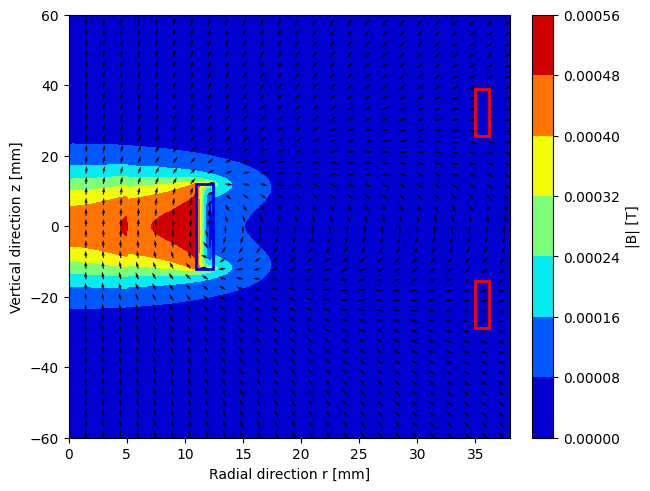

In [119]:
%matplotlib inline
# Call the plotting function from MakeBfield
MakeBfield.plot_b_field('typeA_dr_1_dz_01_Mesh_0.005', n_quiver_z=300, coil_type='A', shift_z=5)
# Adjust plot
plt.xlabel("Radial direction r [mm]")
plt.ylabel("Vertical direction z [mm]")
#plt.title("title")
#plt.ylim([0,45])

plt.show(block=False)

The rest of the code is for analyzing the flux and the induced voltages.

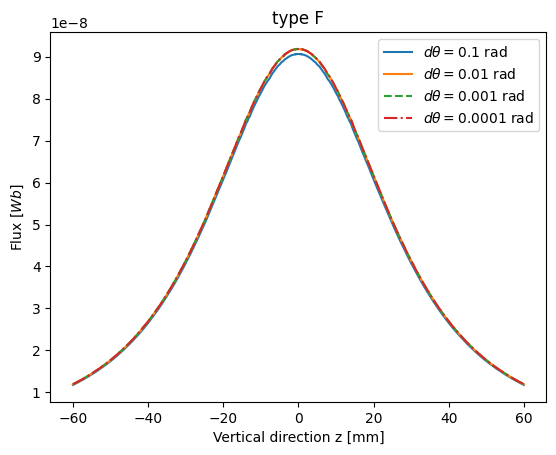

In [103]:
# Plot the flux
%matplotlib inline
z_vec, phi_vec = MakeBfield.return_flux_vec(filename='typeA_dr_1_dz_01_asymm_x0_dtheta1')
z_vec2, phi_vec2 = MakeBfield.return_flux_vec(filename='typeA_dr_1_dz_01_asymm_x0_dtheta01')
z_vec3, phi_vec3 = MakeBfield.return_flux_vec(filename='typeA_dr_1_dz_01_asymm_x0_dtheta001')
z_vec4, phi_vec4 = MakeBfield.return_flux_vec(filename='typeA_dr_1_dz_01_asymm_x0_dtheta0001')
"""
z_vec, phi_vec = MakeBfield.return_flux_vec(filename='typeF_dr_1_dz_01_asymm_x0_dtheta1')
z_vec2, phi_vec2 = MakeBfield.return_flux_vec(filename='typeF_dr_1_dz_01_asymm_x0_dtheta01')
z_vec3, phi_vec3 = MakeBfield.return_flux_vec(filename='typeF_dr_1_dz_01_asymm_x0_dtheta001')
z_vec4, phi_vec4 = MakeBfield.return_flux_vec(filename='typeF_dr_1_dz_01_asymm_x0_dtheta0001')
"""
#z_vec5, phi_vec5 = MakeBfield.return_flux_vec(filename='typeF_dr_1_dz_1_New_symm')

plt.plot(z_vec, phi_vec, label=r'$d\theta = 0.1$ rad')
plt.plot(z_vec2, phi_vec2, label=r'$d\theta = 0.01$ rad')
plt.plot(z_vec3, phi_vec3, label=r'$d\theta = 0.001$ rad', linestyle='dashed')
plt.plot(z_vec4, phi_vec4, label=r'$d\theta = 0.0001$ rad', linestyle='dashdot')
#plt.plot(z_vec2, phi_vec2, label=r'$d\theta = 0.1 $')
#plt.plot(z_vec3, phi_vec3, label=r'$d\theta = 0.001 $', linestyle='dotted', color='r')
#plt.plot(z_vec4, phi_vec4, label=r'$d\theta = 0.01 $', linestyle='dotted', color='r')
#plt.plot(z_vec4, phi_vec4, label='offset: 5mm')
#plt.plot(z_vec3, phi_vec3, label=r'$d\theta = 0.01 $')
plt.xlabel('Vertical direction z [mm]')
plt.ylabel(r'Flux [$Wb$]')
plt.title('type F')
plt.legend()
#plt.xlim([-30,-10])
#plt.ylim([0.1e-6,0.25e-6])

-0.012738853503184516
-0.013210249880629835


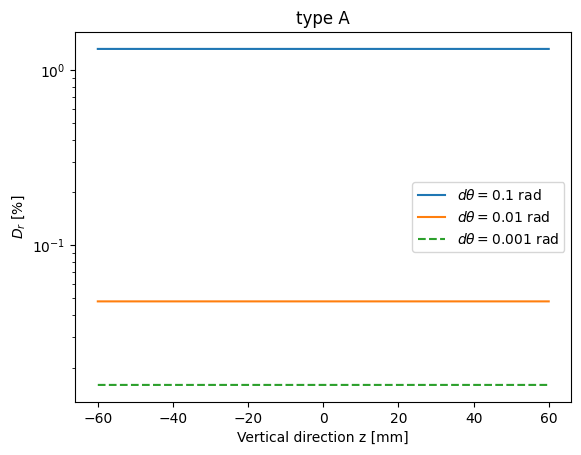

In [106]:
from MakeBfield import indx_closest
indx_symm = indx_closest(z_vec, 0)
indx_d01 = indx_closest(z_vec2, 0)
indx_d001 = indx_closest(z_vec4, 0)

print((phi_vec[indx_symm]-phi_vec2[indx_symm])/phi_vec2[indx_symm])
print((phi_vec[indx_symm]-phi_vec4[indx_d001])/phi_vec4[indx_symm])

plt.plot(z_vec, 100*(phi_vec4-phi_vec)/phi_vec4, label=r'$d\theta = 0.1$ rad')
plt.plot(z_vec2, 100*(phi_vec4-phi_vec2)/phi_vec4, label=r'$d\theta = 0.01$ rad')
plt.plot(z_vec3, 100*(phi_vec4-phi_vec3)/phi_vec4, label=r'$d\theta = 0.001$ rad', linestyle='dashed')
#plt.plot(z_vec4, phi_vec4, label=r'$d\theta = 0.0001$ rad', linestyle='dashdot')
#plt.plot(z_vec2, phi_vec2, label=r'$d\theta = 0.1 $')
#plt.plot(z_vec3, phi_vec3, label=r'$d\theta = 0.001 $', linestyle='dotted', color='r')
#plt.plot(z_vec4, phi_vec4, label=r'$d\theta = 0.01 $', linestyle='dotted', color='r')
#plt.plot(z_vec4, phi_vec4, label='offset: 5mm')
#plt.plot(z_vec3, phi_vec3, label=r'$d\theta = 0.01 $')
plt.xlabel('Vertical direction z [mm]')
plt.ylabel(r'$D_r$ [%]')
plt.yscale('log')
plt.title('type A')
plt.legend()
#plt.xlim([-5,5])
#plt.ylim([0.28e-6,0.32e-6])

In [143]:
layer1 = np.load('../dataMap/FEMM_data/'+ 'typeF_dr_1_dz_1_New_1layer'+'.npz')
#layer5 = np.load('../dataMap/FEMM_data/'+ 'typeF_40steps_1dz_20shift_new'+'.npz')
layer5New = np.load('../dataMap/FEMM_data/' + 'typeF_dr_1_dz_1_New'+'.npz')
b = np.load('../dataMap/FEMM_data/' + 'type_F_40mm' + '.npz')
manual = np.load('../dataMap/voltages/'+ 'typeF_dr_1_dz_01_New_symm'+'.npz')
manual1A = np.load('../dataMap/voltages/'+ 'typeA_dr_1_dz_01_asymm_x1_dtheta01'+'.npz')
manual3A = np.load('../dataMap/voltages/'+ 'typeA_dr_1_dz_01_asymm_x3_dtheta01'+'.npz')
manual5A = np.load('../dataMap/voltages/'+ 'typeA_dr_1_dz_01_asymm_x5_dtheta01'+'.npz')
manualA = np.load('../dataMap/voltages/'+'typeA_dr_1_dz_01_1layer_symm' +'.npz')
FEMM_A = np.load('../dataMap/FEMM_data/'+ 'typeA_60steps_1dz_30shift_5layers'+'.npz')

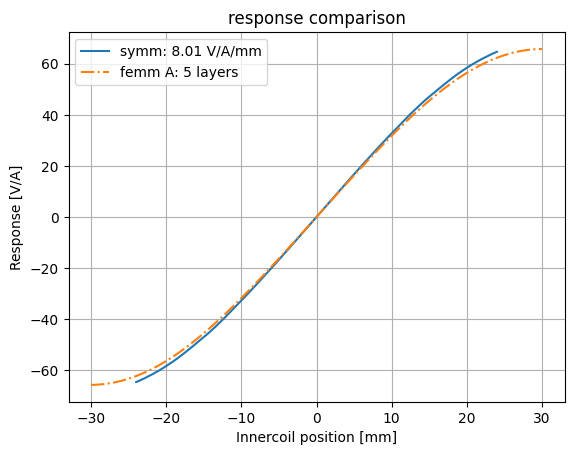

In [145]:
#Plot the data
%matplotlib inline

plt.plot(manualA["z_vec"], 5*50*(np.flipud(manualA["v_upp"])-manualA["v_low"]), label='symm: 8.01 V/A/mm')
#plt.plot(layer5["IC_positions"], 50*(layer5["UOC_voltages"]-layer5["LOC_voltages"]), label='femm 5 coil layer')
plt.plot(FEMM_A["IC_positions"], 50*(abs(FEMM_A["UOC_voltages"])-abs(FEMM_A["LOC_voltages"])), label='femm A: 5 layers', linestyle='dashdot')
#plt.plot(b["IC_positions"], 50*(abs(b["UOC_voltages"])-abs(b["LOC_voltages"])), label='femm 5 coil layer, Kumar', linestyle='dotted')
"""
plt.plot(manual1A["z_vec"], 50*(np.flipud(manual1A["v_upp"])-manual1A["v_low"]), label='offset 1mm: 7.99 V/A/mm')
plt.plot(manual3A["z_vec"], 50*(np.flipud(manual3A["v_upp"])-manual3A["v_low"]), label='offset 3mm: 8.07 V/A/mm')

plt.plot(manual5A["z_vec"], 50*(np.flipud(manual5A["v_upp"])-manual5A["v_low"]), label='offset 5mm: 8.25 V/A/mm', linestyle='dashdot')
"""
"""
plt.plot(manual3["z_vec"], 50*(np.flipud(manual3["v_upp"])-manual3["v_low"]), label='offset: 3mm: 26.96 V/A/mm', linestyle='dotted')
plt.plot(manual5["z_vec"], 50*(np.flipud(manual5["v_upp"])-manual5["v_low"]), label='offset: 5mm: 29.13 V/A/mm', linestyle='dashed')
"""
plt.xlabel('Innercoil position [mm]')
plt.ylabel('Response [V/A]')
plt.title("response comparison")
plt.legend()
plt.grid()
#plt.xlim([-2,2])
#plt.ylim([-12,12])

the fitted slope m: 7.983607281633043


Text(0, 0.5, 'error')

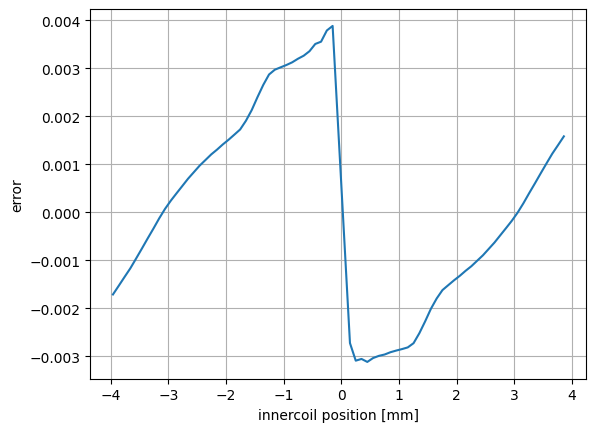

In [5]:
from MakeBfield import fit_slope

y_response2 = 50*(np.flipud(manualA["v_upp"])-manualA["v_low"])
x_pos2 = manualA["z_vec"]

fit_slope(x_pos2,y_response2,-4,4, error=True)
plt.grid()
plt.xlabel('innercoil position [mm]')
plt.ylabel('error')

C:\Users\michi\PycharmProjects\pythonProject1\venv\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


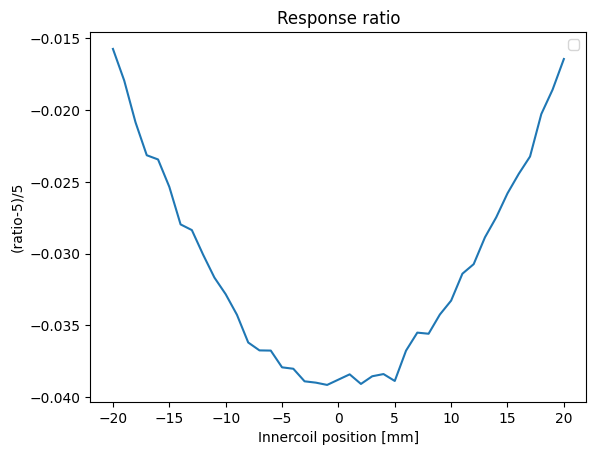

In [32]:
#Plot the data
%matplotlib inline

response_1layer = 50*(layer1["UOC_voltages"]-layer1["LOC_voltages"])/layer1["IC_voltages"]
response_5layer = 50*(layer5["UOC_voltages"]-layer5["LOC_voltages"])/layer5["IC_voltages"]

ratio_response = response_5layer/response_1layer

plt.plot(layer1["IC_positions"][np.absolute(layer1["IC_positions"])>0.3], 0.2*(ratio_response[np.absolute(layer1["IC_positions"])>0.3]-5))

plt.xlabel('Innercoil position [mm]')
plt.ylabel(r'(ratio-5)/5')
plt.title("Response ratio")
plt.legend()

3.083204060734804e-07


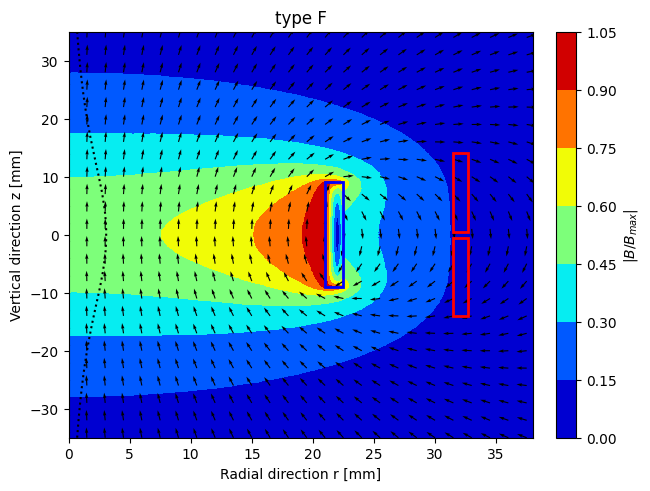

In [142]:
from MakeBfield import plot_b_field
%matplotlib inline
# Call the plotting function from MakeBfield
plot_b_field('typeF_dr_1_dz_01_Mesh_0.005', n_quiver_z=300, n_quiver_r=15, coil_type='F', contour_norm=True)
'acc for nx and ny?'
# Adjust plot
plt.xlabel("Radial direction r [mm]")
plt.ylabel("Vertical direction z [mm]")
plt.title('type F')
#plt.ylim([-45,45])


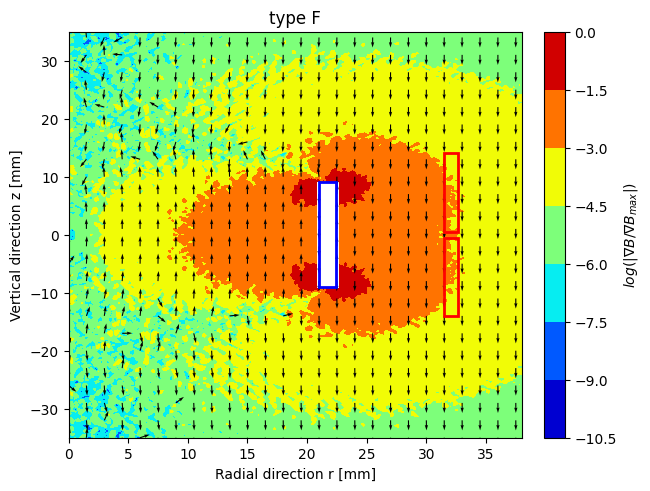

In [4]:
from MakeBfield import plot_b_gradient
%matplotlib inline
# Call the plotting function from MakeBfield
plot_b_gradient('typeF_dr_1_dz_01_Mesh_0.005', logplot=True, n_quiver_z=300, coil_type='F', eps_x=0.2, eps_y=0.2)
'acc for nx and ny?'
# Adjust plot
plt.xlabel("Radial direction r [mm]")
plt.ylabel("Vertical direction z [mm]")
plt.title('type F')

plt.show(block=False)

In [23]:
b = np.load('../dataMap/FEMM_data/'+ 'type_F_40mm'+'.npz')
print(b.files)

['Input_Parameters', 'IC_positions', 'IC_voltages', 'UOC_voltages', 'LOC_voltages', 'IC_currents', 'UOC_currents', 'LOC_currents', 'IC_flux']


In [35]:
A = np.linspace(0,9,10)
print(A)
print(A[0:2])


[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0. 1.]


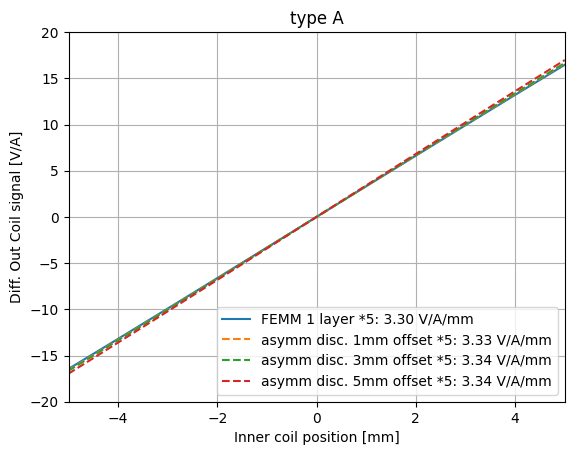

In [205]:
layer_1_winding1 = np.load('../dataMap/FEMM_data/'+ 'typeF_50steps_1dz_25shift_1layers_1winding'+'.npz')
layer_1_winding2 = np.load('../dataMap/FEMM_data/'+ 'typeF_50steps_1dz_25shift_1layers_2winding'+'.npz')
layer_1_winding10 = np.load('../dataMap/FEMM_data/'+ 'typeF_50steps_1dz_25shift_1layers_10winding'+'.npz')
layer_1_windingtotF = np.load('../dataMap/FEMM_data/'+ 'typeF_50steps_1dz_25shift_1layers'+'.npz')
layer_1_windingtotA = np.load('../dataMap/FEMM_data/'+ 'typeA_60steps_1dz_30shift_1layers'+'.npz')

manualF = np.load('../dataMap/voltages/'+ 'typeF_dr_1_dz_01_1layer_symm'+'.npz')
manualFdisc = np.load('../dataMap/voltages/'+ 'typeF_dr_1_dz_01_1layer_symm_disc'+'.npz')
manualA = np.load('../dataMap/voltages/'+ 'typeA_dr_1_dz_01_1layer_symm'+'.npz')
manualAdisc = np.load('../dataMap/voltages/'+ 'typeA_dr_1_dz_01_1layer_symm_disc'+'.npz')
manualA_asymm_1 = np.load('../dataMap/voltages/'+ 'typeA_dr_1_dz_01_asymm_x1_dtheta01_disc'+'.npz')
manualA_asymm_3 = np.load('../dataMap/voltages/'+ 'typeA_dr_1_dz_01_asymm_x3_dtheta01_disc'+'.npz')
manualA_asymm_5 = np.load('../dataMap/voltages/'+ 'typeA_dr_1_dz_01_asymm_x5_dtheta01_disc'+'.npz')
#plt.plot(layer_1_winding1["IC_positions"], 2*np.pi*1e4*(abs(layer_1_winding1["UOC_flux"])-abs(layer_1_winding1["LOC_flux"])), label='femm F: flux diff 1 layer *2*np.pi*1e4')
#plt.plot(layer_1_winding1["IC_positions"], (abs(layer_1_winding1["UOC_voltages"])-abs(layer_1_winding1["LOC_voltages"])), label='femm F: voltage diff 1 layer', linestyle='dashdot')
#plt.plot(layer_1_winding2["IC_positions"], 0.5*(abs(layer_1_winding2["UOC_voltages"])-abs(layer_1_winding2["LOC_voltages"])), label='femm F: voltage diff 2 layer', linestyle='dashdot')
#plt.plot(layer_1_winding10["IC_positions"], 0.1*(abs(layer_1_winding10["UOC_voltages"])-abs(layer_1_winding10["LOC_voltages"])), label='femm F: voltage diff 10 layer', linestyle='dashed')
plt.plot(layer_1_windingtotA["IC_positions"], 5*50*(abs(layer_1_windingtotA["UOC_voltages"])-abs(layer_1_windingtotA["LOC_voltages"])), label='FEMM 1 layer *5: 3.30 V/A/mm')
#plt.plot(layer_1_windingtot["IC_positions"], (1/56)*2*np.pi*1e4*(abs(layer_1_windingtot["UOC_flux"])-abs(layer_1_windingtot["LOC_flux"])), label='femm F: flux diff 56 layer *2*np.pi*1e4 /56', linestyle='dotted')
#plt.plot(manualF["z_vec"], (np.flipud(manualF["v_upp"])-manualF["v_low"]), label='manual voltage /100', linestyle='dotted')
#plt.plot(manualA["z_vec"], 5*50*(np.flipud(manualA["v_upp"])-manualA["v_low"]), label='manual cont. *5: 3.37 V/A/mm', linestyle='dotted')
plt.plot(manualA_asymm_1["z_vec"], 5*50*(np.flipud(manualA_asymm_1["v_upp"])-manualA_asymm_1["v_low"]), label='asymm disc. 1mm offset *5: 3.33 V/A/mm', linestyle='dashed')
plt.plot(manualA_asymm_3["z_vec"], 5*50*(np.flipud(manualA_asymm_3["v_upp"])-manualA_asymm_3["v_low"]), label='asymm disc. 3mm offset *5: 3.34 V/A/mm', linestyle='dashed')
plt.plot(manualA_asymm_5["z_vec"], 5*50*(np.flipud(manualA_asymm_5["v_upp"])-manualA_asymm_5["v_low"]), label='asymm disc. 5mm offset *5: 3.34 V/A/mm', linestyle='dashed')
#plt.plot(manualb["z_vec"], 10e-2*(np.flipud(manualb["v_upp"])-manualb["v_low"]), label='manualb /100', linestyle='dotted')
plt.legend(loc='lower right')
#plt.xlim([-5,5])
#plt.ylim([-20,20])
plt.xlabel('Inner coil position [mm]')
plt.ylabel('Diff. Out Coil signal [V/A]')
plt.title('type A')
plt.grid()

In [132]:
from MakeBfield import fit_slope


y_response2 = 5*50*(abs(np.flipud(manualF_asymm_1["v_upp"]))-abs(manualF_asymm_1["v_low"]))
#y_response2 = 5*50*(abs(layer_1_windingtotF["UOC_voltages"])-abs(layer_1_windingtotF["LOC_voltages"]))
x_pos2 = manualF_asymm_1["z_vec"]
#x_pos2 = layer_1_windingtotF["IC_positions"]

fit_slope(x_pos2,y_response2,-2.5,2.5, error=False)

the fitted slope m: 13.09153798701224


13.09153798701224

C:\Users\michi\AppData\Local\Temp\ipykernel_41508\3815914912.py:44: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(z_vec[indices], phi_vec[indices], 'o-', markerfacecolor='none', label=r'Asymm $a = 0\:mm$', linestyle='dotted')
C:\Users\michi\AppData\Local\Temp\ipykernel_41508\3815914912.py:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(z_vec5th[indices], phi_vec5th[indices], 'o-', markerfacecolor='none', label=r'Asymm 5th $a = 0\:mm$', linestyle='dotted')


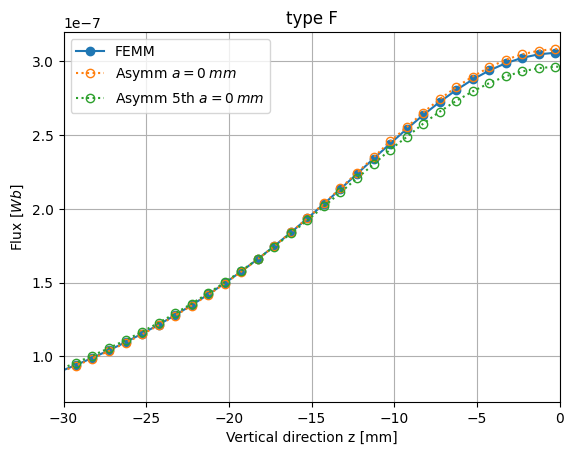

In [162]:
from MakeBfield import moving_average
layer_1_winding1F = np.load('../dataMap/FEMM_data/'+ 'typeF_50steps_1dz_25shift_1layers_1winding'+'.npz')
layer_1_winding1A = np.load('../dataMap/FEMM_data/'+ 'typeA_60steps_1dz_30shift_1winding'+'.npz')
layer_1_winding2 = np.load('../dataMap/FEMM_data/'+ 'typeF_50steps_1dz_25shift_1layers_2winding'+'.npz')
layer_1_winding10 = np.load('../dataMap/FEMM_data/'+ 'typeF_50steps_1dz_25shift_1layers_10winding'+'.npz')
layer_1_windingtotF = np.load('../dataMap/FEMM_data/'+ 'typeF_50steps_1dz_25shift_1layers'+'.npz')
layer_1_windingtotA = np.load('../dataMap/FEMM_data/'+ 'typeA_60steps_1dz_30shift_1layers'+'.npz')
layer_5_windingtotA = np.load('../dataMap/FEMM_data/'+ 'typeA_40steps_025dz_5shift_5layers'+'.npz')
layer_5_windingtotF = np.load('../dataMap/FEMM_data/'+ 'typeF_40steps_025dz_5shift_5layers'+'.npz')
z_vec, phi_vec = MakeBfield.return_flux_vec(filename='typeF_dr_1_dz_01_asymm_x0_dtheta01')
z_vec5th, phi_vec5th = MakeBfield.return_flux_vec(filename='typeF_dr_1_dz_01_asymm_x0_dtheta01_5thlayer')
#z_vec2, phi_vec2 = MakeBfield.return_flux_vec(filename='typeA_dr_1_dz_01_asymm_x0_dtheta01')
z_vec2, phi_vec2 = MakeBfield.return_flux_vec(filename='typeA_dr_1_dz_01_asymm_x0_dtheta001')
#z_vec2, phi_vec2 = MakeBfield.return_flux_vec(filename='typeF_dr_1_dz_01_1layer_symm')

manualF = np.load('../dataMap/voltages/'+ 'typeF_dr_1_dz_01_1layer_symm'+'.npz')
manualFres = np.load('../dataMap/voltages/' + 'typeF_dr_1_dz_01_1layer_symm_Mesh_0.005'+'.npz')
manualFdisc = np.load('../dataMap/voltages/'+ 'typeF_dr_1_dz_01_1layer_symm_disc'+'.npz')
manualA = np.load('../dataMap/voltages/'+ 'typeA_dr_1_dz_01_1layer_symm'+'.npz')
manualAdisc = np.load('../dataMap/voltages/'+ 'typeA_dr_1_dz_01_1layer_symm_disc'+'.npz')

#plt.plot(layer_5_windingtotA["IC_positions"], 50*(abs(layer_5_windingtotA["UOC_voltages"])-abs(layer_5_windingtotA["LOC_voltages"])), 'o-', label='Response: 12.48 V/A/mm')
#plt.plot(layer_5_windingtotF["IC_positions"], 50*(abs(layer_5_windingtotF["UOC_voltages"])), 'o-')

##plt.plot(layer_1_windingtotF["IC_positions"], (1/1)*(abs(layer_1_windingtotF["UOC_voltages"])), label='FEMM 1 layer')
#plt.plot(layer_1_winding1A["IC_positions"]-27.25, (1e-4/(2*np.pi*1))*(abs(layer_1_winding1A["UOC_voltages"])), label='femm A: voltage 1 layer', linestyle='dashdot')
#plt.plot(manualA["z_vec"]-27.25, (np.flipud(manualA["v_upp"])), label='manual flux linkage A', linestyle='dotted')
#plt.plot(manualF["z_vec"], (np.flipud(manualF["v_upp"])), label='manual cont.', linestyle='dotted')
##plt.plot(manualFdisc["z_vec"], (np.flipud(manualFdisc["v_upp"])), label='manual disc.', linestyle='dotted')
##plt.plot(manualFres["z_vec"], (np.flipud(manualFres["v_upp"])), label='manual disc. res', linestyle='dotted')
#plt.plot(manualF["z_vec"], (manualF["v_low"]), label='manual cont.', linestyle='dotted')
#plt.plot(manualFdisc["z_vec"], (manualFdisc["v_low"]), label='manual disc.', linestyle='dotted')
#plt.plot(layer_1_winding1F["IC_positions"]-7.25, (abs(layer_1_winding1F["UOC_flux"])), 'o-', label='FEMM')
plt.plot(layer_1_winding1F["IC_positions"]-7.25, (abs(layer_1_winding1F["UOC_flux"])), 'o-', label='FEMM')
#plt.plot(layer_1_winding2["IC_positions"]-7.25, 0.5*(abs(layer_1_winding2["UOC_flux"])), label='femm F: flux 2 layer *0.5', linestyle='dashdot')
#plt.plot(layer_1_winding10["IC_positions"]-7.25, 0.1*(abs(layer_1_winding10["UOC_flux"])), label='femm F: flux 10 layer *0.1', linestyle='dashed')
#plt.plot(layer_1_windingtot["IC_positions"]-27.25, (1/56.5)*(abs(layer_1_windingtot["UOC_flux"])), label='femm A: flux 56 layer /56', linestyle='dotted')
#plt.plot(layer_1_windingtotF["IC_positions"]-7.25, 0.31*(1/56.5)*(abs(layer_1_windingtotF["UOC_flux"])), label='femm F: flux 56 layer /56', linestyle='dotted')
#plt.plot(z_vec, 1e-1*phi_vec, label='Symm computation 1 wind *1e-1', linestyle='dotted')
xSub = z_vec
pos = layer_1_winding1F["IC_positions"]-7.25
# Find the indices where x matches the positions in pos
indices = np.searchsorted(xSub, pos)
plt.plot(z_vec[indices], phi_vec[indices], 'o-', markerfacecolor='none', label=r'Asymm $a = 0\:mm$', linestyle='dotted')
plt.plot(z_vec5th[indices], phi_vec5th[indices], 'o-', markerfacecolor='none', label=r'Asymm 5th $a = 0\:mm$', linestyle='dotted')
#plt.plot(z_vec2, phi_vec2, label='Symm flux Type F', linestyle='dotted')
plt.legend(loc='upper left')
plt.xlabel('Vertical direction z [mm]')
plt.ylabel(r'Flux [$Wb$]')
plt.xlim([-30,0])
#plt.ylim([2.5e-7,3.3e-7])
plt.title('type F')
plt.grid()

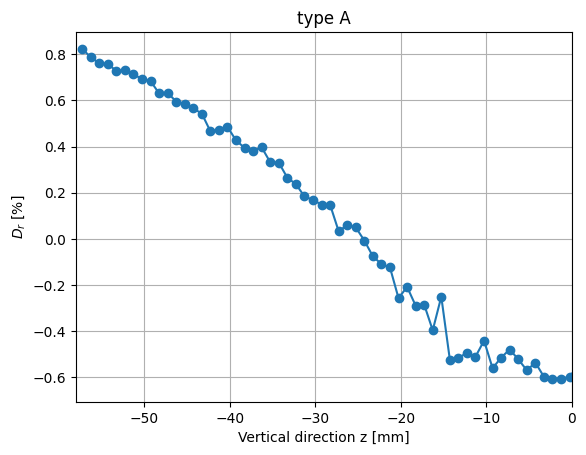

In [44]:
layer_1_winding1F = np.load('../dataMap/FEMM_data/'+ 'typeF_50steps_1dz_25shift_1layers_1winding'+'.npz')
layer_1_winding1A = np.load('../dataMap/FEMM_data/'+ 'typeA_60steps_1dz_30shift_1winding'+'.npz')
z_vec, phi_vec = MakeBfield.return_flux_vec(filename='typeF_dr_1_dz_01_asymm_x0_dtheta01')
z_vec2, phi_vec2 = MakeBfield.return_flux_vec(filename='typeA_dr_1_dz_01_asymm_x0_dtheta001')
xSub = z_vec2
pos = layer_1_winding1A["IC_positions"]-27.25
# Find the indices where x matches the positions in pos
indices = np.searchsorted(xSub, pos)
#plt.plot(layer_1_winding1F["IC_positions"]-7.25, (abs(layer_1_winding1F["UOC_flux"])), 'o-', label='FEMM')
plt.plot(layer_1_winding1A["IC_positions"]-27.25, 100*((abs(layer_1_winding1A["UOC_flux"]) - phi_vec2[indices])/(abs(layer_1_winding1A["UOC_flux"]))), 'o-')
plt.xlabel('Vertical direction z [mm]')
plt.ylabel(r'$D_r$ [%]')
plt.xlim([-58,0])
#plt.ylim([-0.5,0.15])
plt.title('type A')
plt.grid()

In [22]:
from MakeBfield import fit_slope

xSub = manualA_asymm_0_5lay["z_vec"]
pos = layer_5_windingtotA["IC_positions"]
#print(xSub)
# Find the indices where x matches the positions in pos
indices = np.searchsorted(xSub, pos)


y_response2 = 50*(abs(np.flipud(manualA_asymm_0_5lay["v_upp"][indices]))-abs(manualA_asymm_0_5lay["v_low"][indices]))
#x_pos2 = manualF_asymm_0_5lay["z_vec"]
# y_response2 = 50*(abs(layer_5_windingtotA["UOC_voltages"])-abs(layer_5_windingtotA["LOC_voltages"]))
x_pos2 = layer_5_windingtotA["IC_positions"]
f_range = 1
fit_slope(x_pos2,y_response2,-f_range,f_range, error=False)


the fitted slope m: 3.286222580443647


3.286222580443647

In [154]:
layer_1st_windingF = np.load('../dataMap/FEMM_data/'+ 'typeF_40steps_025dz_5shift_1layer'+'.npz')
layer_2nd_windingF = np.load('../dataMap/FEMM_data/'+ 'typeF_40steps_025dz_5shift_2ndlayer'+'.npz')
layer_3rd_windingF = np.load('../dataMap/FEMM_data/'+ 'typeF_40steps_025dz_5shift_3rdlayer'+'.npz')
layer_4th_windingF = np.load('../dataMap/FEMM_data/'+ 'typeF_40steps_025dz_5shift_4thlayer'+'.npz')
layer_5th_windingF = np.load('../dataMap/FEMM_data/'+ 'typeF_40steps_025dz_5shift_5thlayer'+'.npz')

uppVtot = abs(layer_1st_windingF["UOC_voltages"]) + abs(layer_2nd_windingF["UOC_voltages"]) + abs(layer_3rd_windingF["UOC_voltages"]) + abs(layer_4th_windingF["UOC_voltages"]) + abs(layer_5th_windingF["UOC_voltages"])
lowVtot = abs(layer_1st_windingF["LOC_voltages"]) + abs(layer_2nd_windingF["LOC_voltages"]) + abs(layer_3rd_windingF["LOC_voltages"]) + abs(layer_4th_windingF["LOC_voltages"]) + abs(layer_5th_windingF["LOC_voltages"])

C:\Users\michi\AppData\Local\Temp\ipykernel_41508\4016698426.py:75: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(pos, 50*(np.flipud(manualFdisc["v_upp"][indices]) - manualFdisc["v_low"][indices]), 'o-', label='1st layer', linestyle='dotted', markerfacecolor='none')
C:\Users\michi\AppData\Local\Temp\ipykernel_41508\4016698426.py:78: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(pos, 50*(np.flipud(manualFdisc5th["v_upp"][indices]) - manualFdisc5th["v_low"][indices]), 'o-', label='5th layer', linestyle='dotted', markerfacecolor='none')


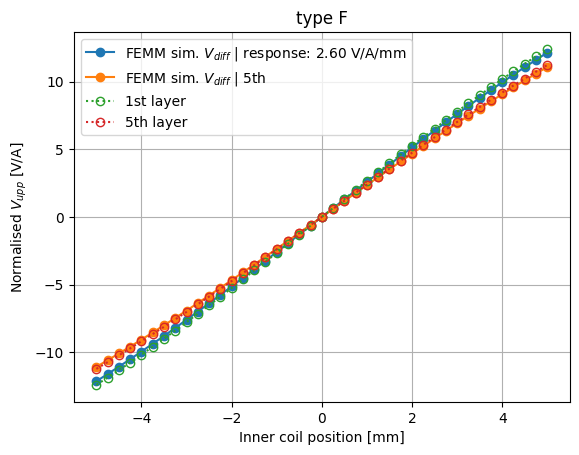

In [160]:
from MakeBfield import fit_slope
layer_1_winding1 = np.load('../dataMap/FEMM_data/'+ 'typeF_50steps_1dz_25shift_1layers_1winding'+'.npz')
layer_1_winding2 = np.load('../dataMap/FEMM_data/'+ 'typeF_50steps_1dz_25shift_1layers_2winding'+'.npz')
layer_1_winding10 = np.load('../dataMap/FEMM_data/'+ 'typeF_50steps_1dz_25shift_1layers_10winding'+'.npz')
layer_1_windingtotF = np.load('../dataMap/FEMM_data/'+ 'typeF_40steps_025dz_5shift_1layer'+'.npz')
layer_5_windingtotF = np.load('../dataMap/FEMM_data/'+ 'typeF_40steps_025dz_5shift_5layers'+'.npz')
layer_5_windingtotF_plus5 = np.load('../dataMap/FEMM_data/'+ 'typeF_40steps_025dz_5shift_plus5rad'+'.npz')
layer_5_windingtotF_plus10 = np.load('../dataMap/FEMM_data/'+ 'typeF_40steps_025dz_5shift_plus10rad'+'.npz')

layer_5_windingtotA = np.load('../dataMap/FEMM_data/'+ 'typeA_40steps_025dz_5shift_5layers'+'.npz')
manualA_asymm_0_5lay = np.load('../dataMap/voltages/'+ 'typeA_dr_1_dz_01_asymm_x0_dtheta001_5layers_Tot_disc'+'.npz')


manualF_asymm_1_par = np.load('../dataMap/voltages/'+ 'typeF_dr_1_dz_01_asymm_x1_dtheta01_5layers_test_par_Tot'+'.npz')

manualF_asymm_0 = np.load('../dataMap/voltages/'+ 'typeF_dr_1_dz_01_asymm_x0_dtheta01_disc'+'.npz')
manualF_asymm_1 = np.load('../dataMap/voltages/'+ 'typeF_dr_1_dz_01_asymm_x1_dtheta01_disc'+'.npz')
manualF_asymm_3 = np.load('../dataMap/voltages/'+ 'typeF_dr_1_dz_01_asymm_x3_dtheta01_disc'+'.npz')
manualF_asymm_5 = np.load('../dataMap/voltages/'+ 'typeF_dr_1_dz_01_asymm_x5_dtheta01_disc'+'.npz')
manualF_asymm_6 = np.load('../dataMap/voltages/'+ 'typeF_dr_1_dz_01_asymm_x6_dtheta01_disc'+'.npz')
manualF_asymm_0_5lay = np.load('../dataMap/voltages/'+ 'typeF_dr_1_dz_01_asymm_x0_dtheta01_5layers_Tot_disc'+'.npz')
#manualF = np.load('../dataMap/voltages/'+ 'typeF_dr_1_dz_1_1layer_symm'+'.npz')
manualFdisc = np.load('../dataMap/voltages/'+ 'typeF_dr_1_dz_01_1layer_symm_disc'+'.npz')
manualFdisc2nd = np.load('../dataMap/voltages/'+ 'typeF_dr_1_dz_01_asymm_x0_dtheta01_2ndlayer_disc'+'.npz')
manualFdisc4th = np.load('../dataMap/voltages/'+ 'typeF_dr_1_dz_01_asymm_x0_dtheta01_4thlayer_disc'+'.npz')
manualFdisc5th = np.load('../dataMap/voltages/'+ 'typeF_dr_1_dz_01_asymm_x0_dtheta01_5thlayer_disc'+'.npz')
#manualFdiscplus10 = np.load('../dataMap/voltages/'+ 'typeF_dr_1_dz_01_1layer_symm_rad_plus10_disc'+'.npz')
#manualA = np.load('../dataMap/voltages/'+ 'typeA_dr_1_dz_01_1layer_symm'+'.npz')
#manualAdisc = np.load('../dataMap/voltages/'+ 'typeA_dr_1_dz_01_1layer_symm_disc'+'.npz')




xSub = manualF_asymm_0_5lay["z_vec"]
pos = layer_5_windingtotF["IC_positions"]
#print(xSub)
# Find the indices where x matches the positions in pos
indices = np.searchsorted(xSub, pos)

#plt.plot(layer_5_windingtotF["IC_positions"], 50*(uppVtot-lowVtot), 'o-', label='FEMM 5 layers indiv.: 12.48 V/A/mm')

#plt.plot(layer_5_windingtotA["IC_positions"], 50*(abs(layer_5_windingtotA["UOC_voltages"])-abs(layer_5_windingtotA["LOC_voltages"])), 'o-', label=r'FEMM sim. $V_{diff}$ | $m=\:3.28 V/Amm$')

#plt.plot(layer_5_windingtotF["IC_positions"], 50*(abs(layer_5_windingtotF["UOC_voltages"])-abs(layer_5_windingtotF["LOC_voltages"])), 'o-', label=r'FEMM sim. $V_{diff}$ | $m=12.48\:V/Amm$')

plt.plot(layer_1_windingtotF["IC_positions"], 50*(abs(layer_1_windingtotF["UOC_voltages"])-abs(layer_1_windingtotF["LOC_voltages"])), 'o-', label=r'FEMM sim. $V_{diff}$ | response: 2.60 V/A/mm')
plt.plot(layer_5th_windingF["IC_positions"], 50*(abs(layer_5th_windingF["UOC_voltages"])-abs(layer_5th_windingF["LOC_voltages"])), 'o-', label=r'FEMM sim. $V_{diff}$ | 5th')

"""
y_response3 = 50*(abs(layer_1_windingtotF["UOC_voltages"])-abs(layer_1_windingtotF["LOC_voltages"]))
x_pos3 = layer_1_windingtotF["IC_positions"]
p3 = fit_slope(x_pos3,y_response3,-0.5,0.5, returnF=True)
#plt.plot(x_pos3,p3(x_pos3), linestyle='dashed', label=r'lin. fit FEMM sim. over $\pm0.5\:mm$')
#"""

"""
y_responseA = 50*(abs(layer_5_windingtotA["UOC_voltages"])-abs(layer_5_windingtotA["LOC_voltages"]))
x_posA = layer_5_windingtotA["IC_positions"]
pA = fit_slope(x_posA,y_responseA,-1,1, returnF=True)
plt.plot(x_posA,pA(x_posA), linestyle='dashed', label=r'lin. fit over $\pm1\:mm$')
#"""

"""
y_response3 = 50*(abs(layer_5_windingtotA["UOC_voltages"])-abs(layer_5_windingtotA["LOC_voltages"]))
x_pos3 = layer_5_windingtotA["IC_positions"]
p3, slope  = fit_slope(x_pos3,y_response3,-1,1, returnF=True)
plt.plot(x_pos3,p3(x_pos3), linestyle='dashed', label=r'lin. fit over $\pm 1 \:mm$')
#"""

#plt.plot(layer_5_windingtotF_plus5["IC_positions"], 50*(abs(layer_5_windingtotF_plus5["UOC_voltages"])-abs(layer_5_windingtotF_plus5["LOC_voltages"])), 'o-', label='FEMM 5 layers +5mm rad: 7.84 V/A/mm')
#plt.plot(layer_5_windingtotF_plus10["IC_positions"], 50*(abs(layer_5_windingtotF_plus10["UOC_voltages"])-abs(layer_5_windingtotF_plus10["LOC_voltages"])), 'o-', label='FEMM 5 layers +10mm rad: 5.21 V/A/mm')
#plt.plot(layer_1_windingtotF["IC_positions"], 5*50*(abs(layer_1_windingtotF["UOC_voltages"])-abs(layer_1_windingtotF["LOC_voltages"])), 'o-', label='FEMM 1 layer *5: 12.48 V/A/mm')
#plt.plot(layer_1_windingtot["IC_positions"], (1/56)*2*np.pi*1e4*(abs(layer_1_windingtot["UOC_flux"])-abs(layer_1_windingtot["LOC_flux"])), label='femm F: flux diff 56 layer *2*np.pi*1e4 /56', linestyle='dotted')

plt.plot(pos, 50*(np.flipud(manualFdisc["v_upp"][indices]) - manualFdisc["v_low"][indices]), 'o-', label='1st layer', linestyle='dotted', markerfacecolor='none')
# plt.plot(pos, 50*(np.flipud(manualFdisc2nd["v_upp"][indices])), 'o-', label='2nd layer', linestyle='dotted')
# plt.plot(pos, 50*(np.flipud(manualFdisc4th["v_upp"][indices])), 'o-', label='4th layer', linestyle='dotted')
plt.plot(pos, 50*(np.flipud(manualFdisc5th["v_upp"][indices]) - manualFdisc5th["v_low"][indices]), 'o-', label='5th layer', linestyle='dotted', markerfacecolor='none')
# plt.plot(xSub, 50*(np.flipud(manualFdisc["v_upp"])), '--', label='1st layer', linestyle='dotted')
# plt.plot(xSub, 50*(np.flipud(manualFdisc2nd["v_upp"])), '-.', label='2nd layer', linestyle='dotted')
# plt.plot(xSub, 50*(np.flipud(manualFdisc4th["v_upp"])), '-.', label='4th layer', linestyle='dotted')
# plt.plot(xSub, 50*(np.flipud(manualFdisc5th["v_upp"])), '--', label='5th layer', linestyle='dotted')

#plt.plot(pos, 50*(np.flipud(manualF_asymm_0["v_upp"][indices])-manualF_asymm_0["v_low"][indices]), 'o-', label=r'Asymm $a=0\:mm$ $V_{diff}$ | response: 2.65 V/A/mm ', linestyle='dotted', markerfacecolor='none')
#plt.plot(pos, 50*(np.flipud(manualF_asymm_0_5lay["v_upp"][indices])-manualF_asymm_0_5lay["v_low"][indices]), 'o-', label=r'Asymm $a=0\:mm$ $V_{diff}$ | $m=\:12.56 V/Amm$', linestyle='dotted', markerfacecolor='none')
#plt.plot(pos, 50*(np.flipud(manualA_asymm_0_5lay["v_upp"][indices])-manualA_asymm_0_5lay["v_low"][indices]), 'o-', label=r'Asymm $a=0\:mm$ $V_{diff}$ | $m=\:3.29 V/Amm$', linestyle='dotted', markerfacecolor='none')

#plt.plot(pos, 50*(np.flipud(manualF_asymm_0_5lay["v_upp"][indices])-manualF_asymm_0_5lay["v_low"][indices]), 'o-', label=r'Asymm $a=0\:mm$ $V_{diff}$ | $m=12.57\:V/Amm$', linestyle='dotted', markerfacecolor='none')

"""
plt.plot(pos, 5*50*(np.flipud(manualF_asymm_1["v_upp"][indices])-manualF_asymm_1["v_low"][indices]), 'o-', label='asymm 1mm: 1 layer *5: 13.21 V/A/mm ', linestyle='dotted')
plt.plot(pos, 5*50*(np.flipud(manualF_asymm_3["v_upp"][indices])-manualF_asymm_3["v_low"][indices]), 'o-', label='asymm 3mm: 1 layer *5: 13.64 V/A/mm ', linestyle='dotted')
plt.plot(pos, 5*50*(np.flipud(manualF_asymm_5["v_upp"][indices])-manualF_asymm_5["v_low"][indices]), 'o-', label='asymm 5mm: 1 layer *5: 14.52 V/A/mm ', linestyle='dotted')
plt.plot(pos, 5*50*(np.flipud(manualF_asymm_6["v_upp"][indices])-manualF_asymm_6["v_low"][indices]), 'o-', label='asymm 6mm: 1 layer *5: 15.17 V/A/mm ', linestyle='dotted')
#"""

f_range = 0.5

"""
y_response3 = 50*(abs(layer_5_windingtotF["UOC_voltages"])-abs(layer_5_windingtotF["LOC_voltages"]))
x_pos3 = layer_5_windingtotF["IC_positions"]
p3, slope = fit_slope(x_pos3,y_response3,-f_range,f_range, returnF=True)
plt.plot(x_pos3,p3(x_pos3), linestyle='dashed', label=r'lin. fit FEMM over $\pm$' +str(f_range) +'$\:mm$')
#"""

"""
y_response4 = 50*(np.flipud(manualF_asymm_0_5lay["v_upp"][indices])-manualF_asymm_0_5lay["v_low"][indices])
x_pos4 = layer_5_windingtotF["IC_positions"]
p4, slope = fit_slope(x_pos4,y_response4,-f_range,f_range, returnF=True)
plt.plot(x_pos4,p4(x_pos4), linestyle='dashdot', label=r'lin. fit Asymm $a=0\:mm$ over $\pm$' +str(f_range) +'$\:mm$')
#"""

plt.legend(loc='upper left')
#plt.xlim([-5,5])
#plt.ylim([-20,20])
plt.xlabel('Inner coil position [mm]')
plt.ylabel(r'Normalised $V_{upp}$ [V/A]')
plt.title('type F')
plt.grid()


the fitted slope m: 3.286222580443647
the fitted slope m: 3.286683971289151
the fitted slope m: 3.2975826768784056
the fitted slope m: 3.318999873220132
the fitted slope m: 3.4076763373230143
the fitted slope m: 3.5003535056026274
the fitted slope m: 3.4967672526896574
the fitted slope m: 3.286222580443647


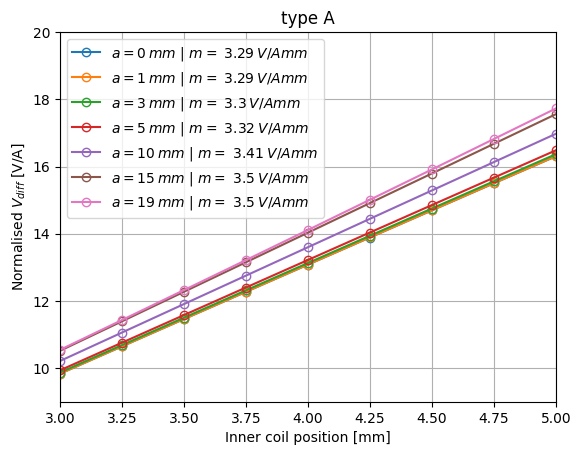

In [147]:
from MakeBfield import fit_slope, fit_slope_dev, indx_closest
from scipy.optimize import curve_fit
layer_5_windingtotF = np.load('../dataMap/FEMM_data/'+ 'typeF_40steps_025dz_5shift_5layers'+'.npz')
manualF_asymm_0_5lay = np.load('../dataMap/voltages/'+ 'typeF_dr_1_dz_01_asymm_x0_dtheta01_5layers_Tot_disc'+'.npz')
layer_5_windingtotA = np.load('../dataMap/FEMM_data/'+ 'typeA_40steps_025dz_5shift_5layers'+'.npz')
manualA_asymm_0_5lay = np.load('../dataMap/voltages/'+ 'typeA_dr_1_dz_01_asymm_x0_dtheta001_5layers_full_Tot_disc'+'.npz')

# xSub = manualF_asymm_0_5lay["z_vec"]
# pos = layer_5_windingtotF["IC_positions"]
xSub = manualA_asymm_0_5lay["z_vec"]
pos = layer_5_windingtotA["IC_positions"]
#print(xSub)
# Find the indices where x matches the positions in pos
indices = np.searchsorted(xSub, pos)


f_range = 1

F_off = [0,1,3,5,6]
A_off = [0,1,3,5,10,15,19]
pos_vec = []
v_vec = []

resp_vec = []
fit_vec = []
slope_vec = []
for a in A_off:
    data_i = np.load('../dataMap/voltages/'+ 'typeA_dr_1_dz_01_asymm_x' + str(a) +'_dtheta001_5layers_full_Tot_disc'+'.npz')
    #data_i = np.load('../dataMap/voltages/'+ 'typeF_dr_1_dz_01_asymm_x' + str(a) +'_dtheta01_5layers_Tot_disc'+'.npz')
    y_response_i = 50*(np.flipud(data_i["v_upp"][indices])-data_i["v_low"][indices])
    p_i, m_i = fit_slope(pos,y_response_i,-f_range,f_range, returnF=True)
    #p_i, m_i, cov = fit_slope_dev(pos,y_response_i,-f_range,f_range,0.1*np.ones(len(pos)), returnF=True)
    resp_vec.append(y_response_i)
    fit_vec.append(p_i(pos))
    slope_vec.append(m_i)
    plt.plot(pos,y_response_i, 'o-', markerfacecolor='none', label=r'$a=$' + str(a) + r'$\:mm$ | $m=$ ' +str(round(m_i,2)) + r'$\:V/Amm$' )

y_response4 = 50*(np.flipud(manualA_asymm_0_5lay["v_upp"][indices])-manualA_asymm_0_5lay["v_low"][indices])
x_pos4 = layer_5_windingtotA["IC_positions"]
p4, slope = fit_slope(x_pos4,y_response4,-1,1, returnF=True)
#plt.plot(x_pos4,p4(x_pos4), linestyle='dashdot', label=r'lin. fit Asymm $a=0\:mm$', color='orangered')
#plt.xlim([3,5])
#plt.ylim([9,20])
plt.legend(loc='upper left')
plt.xlabel('Inner coil position [mm]')
plt.ylabel(r'Normalised $V_{diff}$ [V/A]')
plt.title('type A')
plt.grid()

In [75]:
np.savez('../dataMap/TransDev/TypeA_Responses', Responses=slope_vec, offset=A_off)

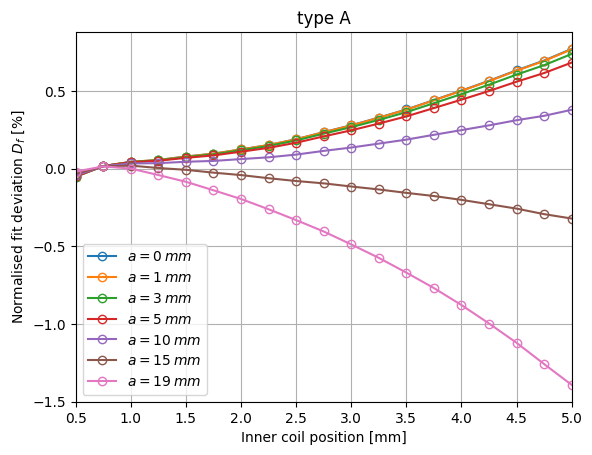

In [107]:
from MakeBfield import fit_slope
layer_5_windingtotF = np.load('../dataMap/FEMM_data/'+ 'typeF_40steps_025dz_5shift_5layers'+'.npz')
manualF_asymm_0_5lay = np.load('../dataMap/voltages/'+ 'typeF_dr_1_dz_01_asymm_x0_dtheta01_5layers_Tot_disc'+'.npz')

xSub = manualA_asymm_0_5lay["z_vec"]
pos = layer_5_windingtotA["IC_positions"]
#print(xSub)
# Find the indices where x matches the positions in pos
d = 0.1

F_off = [0,1,3,5,6]
A_off = [0,1,3,5,10,15,19]
for i in range(0,len(A_off)):
    dev_i = (fit_vec[i] -  resp_vec[i])/fit_vec[i]
    plt.plot(pos[abs(pos) > d],100*dev_i[abs(pos) > d], 'o-', markerfacecolor='none', label=r'$a=$' + str(A_off[i]) + r'$\:mm$' )
plt.legend(loc='lower left')
#plt.xlim([0.5,5])
#plt.ylim([0,1.5])
plt.xlabel('Inner coil position [mm]')
plt.ylabel(r'Normalised fit deviation $D_f$ [%]')
plt.title('type A')
plt.grid()

C:\Users\michi\AppData\Local\Temp\ipykernel_41508\3086384165.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(A_off, devTrans, 'o-', linestyle='dashed')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.         0.01404016 0.34568859 0.99741548 3.69584695 6.51602014
 6.40689019]


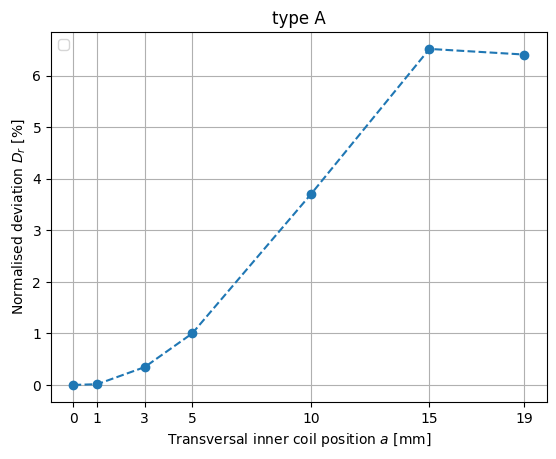

In [18]:
F_off = [0,1,3,5,6]
A_off = [0,1,3,5,10,15,19]
devTrans = 100*(slope_vec-slope_vec[0])/slope_vec[0]
plt.plot(A_off, devTrans, 'o-', linestyle='dashed')
plt.legend(loc='upper left')
#plt.xlim([0.5,5])
#plt.ylim([0,70])
plt.xlabel('Transversal inner coil position $a$ [mm]')
plt.ylabel(r'Normalised deviation $D_r$ [%]')
plt.xticks(A_off)
plt.title('type A')
plt.grid()
print(devTrans)

In [19]:
np.savez('../dataMap/TransDev/TypeA', Trans_off=A_off, dev_trans=devTrans)

In [170]:
slp = np.load('../dataMap/TransDev/TypeF_Responses.npz')
print(slp["Responses"])
ma = slp["Responses"][4]
m0 = slp["Responses"][0]
s_ma = ma*0.008
s_m0 = m0*0.008
print(np.sqrt((ma*s_m0/(m0**2))**2 + (s_ma/m0)**2))

[12.56563624 12.60450819 13.00428217 13.83762502 14.44230035]
0.013003398560547238


In [101]:
dev = np.load('../dataMap/TransDev/TypeA.npz')

print(dev["dev_trans"])

[0.00000000e+00 1.40401581e-02 5.44067004e-01 2.59748531e+00
 9.14651513e+00 1.51294588e+01 1.70154401e+01]


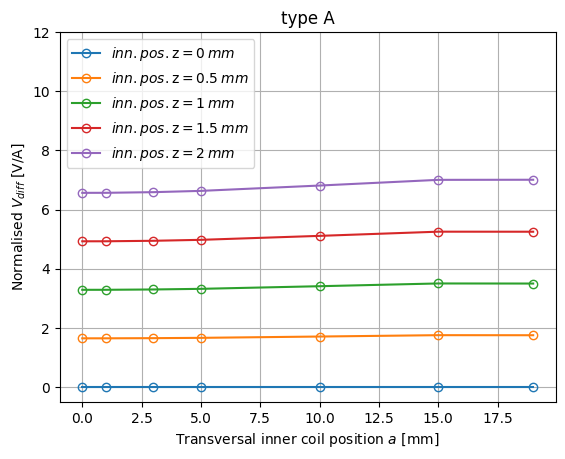

In [140]:
from MakeBfield import fit_slope, fit_slope_dev, indx_closest
from scipy.optimize import curve_fit
layer_5_windingtotF = np.load('../dataMap/FEMM_data/'+ 'typeF_40steps_025dz_5shift_5layers'+'.npz')
manualF_asymm_0_5lay = np.load('../dataMap/voltages/'+ 'typeF_dr_1_dz_01_asymm_x0_dtheta01_5layers_Tot_disc'+'.npz')
layer_5_windingtotA = np.load('../dataMap/FEMM_data/'+ 'typeA_40steps_025dz_5shift_5layers'+'.npz')
manualA_asymm_0_5lay = np.load('../dataMap/voltages/'+ 'typeA_dr_1_dz_01_asymm_x0_dtheta001_5layers_full_Tot_disc'+'.npz')

xSub = manualA_asymm_0_5lay["z_vec"]

# xSub = manualA_asymm_0_5lay["z_vec"]
# pos = layer_5_windingtotA["IC_positions"]
#print(xSub)
# Find the indices where x matches the positions in pos

z_pos = [0, 0.5, 1, 1.5, 2]

F_off = [0,1,3,5,6]
A_off = [0,1,3,5,10,15,19]
off_vec = A_off
pos_vec = []
v_vec = []

curve_vec = []

for z in z_pos:
    v_z = []
    cond = xSub == z
    for a in off_vec:
        data_i = np.load('../dataMap/voltages/'+ 'typeA_dr_1_dz_01_asymm_x' + str(a) +'_dtheta001_5layers_full_Tot_disc'+'.npz')
        #data_i = np.load('../dataMap/voltages/'+ 'typeF_dr_1_dz_01_asymm_x' + str(a) +'_dtheta01_5layers_Tot_disc'+'.npz')
        y_response_i = 50*(np.flipud(data_i["v_upp"])-data_i["v_low"])
        v_z.append(np.extract(cond,y_response_i))
    #print(v_z)
    curve_vec.append(v_z)
    plt.plot(off_vec,v_z, 'o-', markerfacecolor='none', label=r'$inn. pos. $z$=$' + str(z) + r'$\:mm$' )
plt.legend(loc='upper left')
# plt.xlim([0,5])
plt.ylim([-0.5,12])
#plt.ylim([-2,45])
plt.xlabel('Transversal inner coil position $a$ [mm]')
plt.ylabel(r'Normalised $V_{diff}$ [V/A]')
plt.title('type A')
plt.grid()
#plt.savefig('../FiguresSim3/TransversalEffect_TypeF.pdf', bbox_inches='tight')

In [141]:
#np.savez('../dataMap/TransDev/TypeA_transVecs', Trans_off=A_off, V_trans=curve_vec, z_pos=z_pos)
print(curve_vec[4])

[array([6.56445562]), array([6.56538155]), array([6.58748589]), array([6.63087622]), array([6.81124332]), array([7.00364352]), array([7.0071635])]


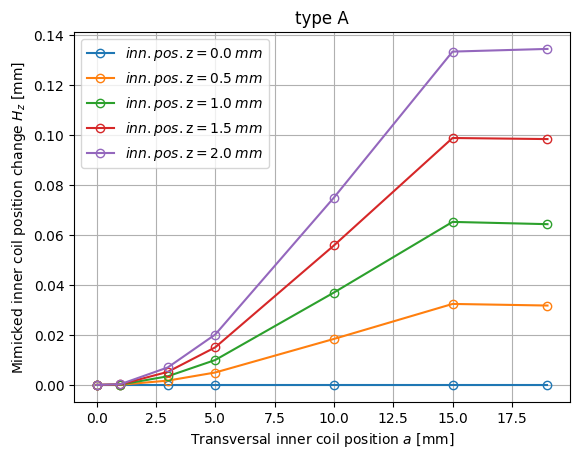

In [130]:
F_data = np.load('../dataMap/TransDev/TypeF_transVecs.npz')
A_data = np.load('../dataMap/TransDev/TypeA_transVecs.npz')
#print(F_data['V_trans'][1])
data = A_data
height = data['z_pos']
m = 3.29
#m = 12.57
for i in range(len(height)):
    imiHeight = (data['V_trans'][i] - data['V_trans'][i][0])/m
    plt.plot(data['Trans_off'], imiHeight,'o-', markerfacecolor='none', label=r'$inn. pos. $z$=$' + str(height[i]) + r'$\:mm$')
plt.legend(loc='upper left')
# plt.xlim([0,5])
# plt.ylim([0,70])
plt.xlabel('Transversal inner coil position $a$ [mm]')
plt.ylabel(r'Mimicked inner coil position change $H_z$ [mm]')
plt.title('type A')
plt.grid()
#plt.savefig('../FiguresSim3/TransversalEffectRelative_TypeA.pdf', bbox_inches='tight')

In [38]:
f_range = 0.5

#plt.plot(xSub, 50*(np.flipud(manualFdisc["v_upp"])-manualFdisc["v_low"]), 'o-', label='manual 1 layer 1 wind', linestyle='dotted')
#plt.plot(manualA["z_vec"], 5*50*(np.flipud(manualA["v_upp"])-manualA["v_low"]), label='manual cont. *5: 3.37 V/A/mm', linestyle='dotted')
#plt.plot(manualb["z_vec"], 10e-2*(np.flipud(manualb["v_upp"])-manualb["v_low"]), label='manualb /100', linestyle='dotted')
#"""
y_response = 50*(abs(layer_5_windingtotA["UOC_voltages"])-abs(layer_5_windingtotA["LOC_voltages"]))
x_pos = layer_5_windingtotA["IC_positions"]
p = fit_slope(x_pos,y_response,-f_range,f_range, returnF=True)
#"""

y_response0 = 50*(np.flipud(manualA_asymm_0_5lay["v_upp"][indices])-manualA_asymm_0_5lay["v_low"][indices])
x_pos0 = layer_5_windingtotA["IC_positions"]
p0, slope = fit_slope(x_pos0,y_response0,-f_range,f_range, returnF=True)
#"""
y_response1 = 5*50*(np.flipud(manualF_asymm_1["v_upp"][indices])-manualF_asymm_1["v_low"][indices])
x_pos1 = layer_1_windingtotF["IC_positions"]
p1 = fit_slope(x_pos1,y_response1,-f_range,f_range, returnF=True)

y_response3 = 5*50*(np.flipud(manualF_asymm_3["v_upp"][indices])-manualF_asymm_3["v_low"][indices])
x_pos3 = layer_1_windingtotF["IC_positions"]
p3 = fit_slope(x_pos3,y_response3,-f_range,f_range, returnF=True)

y_response5 = 5*50*(np.flipud(manualF_asymm_5["v_upp"][indices])-manualF_asymm_5["v_low"][indices])
x_pos5 = layer_1_windingtotF["IC_positions"]
p5 = fit_slope(x_pos5,y_response5,-f_range,f_range, returnF=True)

y_response6 = 5*50*(np.flipud(manualF_asymm_6["v_upp"][indices])-manualF_asymm_6["v_low"][indices])
x_pos6 = layer_1_windingtotF["IC_positions"]
p6 = fit_slope(x_pos6,y_response6,-f_range,f_range, returnF=True)

y_response00 = 5*50*(np.flipud(manualF_asymm_0["v_upp"][indices])-manualF_asymm_0["v_low"][indices])
x_pos00 = layer_1_windingtotF["IC_positions"]
p00 = fit_slope(x_pos00,y_response00,-f_range,f_range, returnF=True)
#"""

"""
y_response2 = 5*50*(abs(layer_1_windingtotF["UOC_voltages"])-abs(layer_1_windingtotF["LOC_voltages"]))
x_pos2 = layer_1_windingtotF["IC_positions"]
p = fit_slope(x_pos2,y_response2,-2.5,2.5, returnF=True)
plt.plot(x_pos2,p(x_pos2), linestyle='dashed', label='fit FEMM 1 layer *5')
#"""

"""
y_response3 = 50*(abs(layer_5_windingtotF["UOC_voltages"])-abs(layer_5_windingtotF["LOC_voltages"]))
x_pos3 = layer_5_windingtotF["IC_positions"]
p3 = fit_slope(x_pos3,y_response3,-2.5,2.5, returnF=True)
plt.plot(x_pos3,p3(x_pos3), linestyle='dashed', label='fit FEMM 5 layer')
#"""

the fitted slope m: 3.2808010178307483
the fitted slope m: 3.289076786376015
the fitted slope m: 16.438664439830177
the fitted slope m: 16.856173758783026
the fitted slope m: 17.715897832588368
the fitted slope m: 18.341345255636178
the fitted slope m: 16.460982839512464


'\ny_response3 = 50*(abs(layer_5_windingtotF["UOC_voltages"])-abs(layer_5_windingtotF["LOC_voltages"]))\nx_pos3 = layer_5_windingtotF["IC_positions"]\np3 = fit_slope(x_pos3,y_response3,-2.5,2.5, returnF=True)\nplt.plot(x_pos3,p3(x_pos3), linestyle=\'dashed\', label=\'fit FEMM 5 layer\')\n#'

the fitted slope m: 12.176183282213708


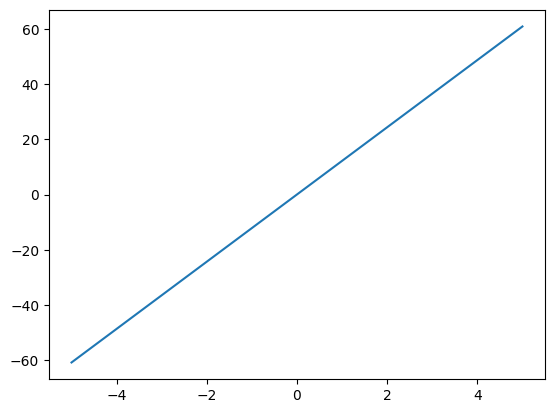

In [76]:
from MakeBfield import fit_slope

#y_response2 = 5*50*(abs(np.flipud(layer_1_windingtotF["UOC_voltages"]))-abs(layer_1_windingtotF["LOC_voltages"]))
y_response2 = 50*(abs(layer_5_windingtotF["UOC_voltages"])-abs(layer_5_windingtotF["LOC_voltages"]))
x_pos2 = layer_5_windingtotF["IC_positions"]
#x_pos2 = layer_1_windingtotA["IC_positions"]

p, slope = fit_slope(x_pos2,y_response2,-4,4, returnF=True)
plt.plot(x_pos2,p(x_pos2))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


41


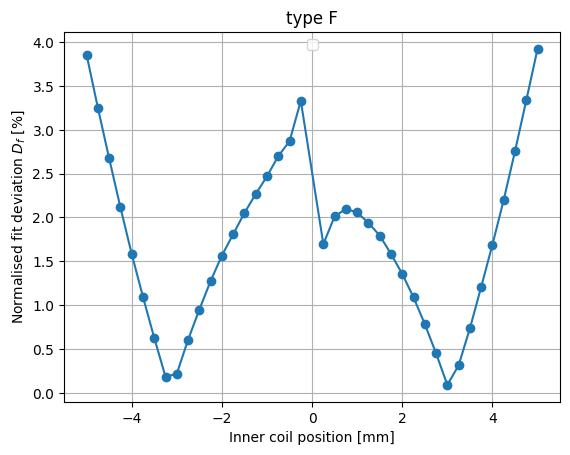

In [79]:
xDiff = layer_5_windingtotF["IC_positions"]
print(len(xDiff))
#perDiff = 50*(5*((abs(layer_1_windingtotF["UOC_voltages"])-abs(layer_1_windingtotF["LOC_voltages"]))) - (abs(layer_1_windingtotF["UOC_voltages"])-abs(layer_1_windingtotF["LOC_voltages"]))) /(abs(layer_1_windingtotF["UOC_voltages"])-abs(layer_1_windingtotF["LOC_voltages"]))
manualFdisc = np.load('../dataMap/voltages/'+ 'typeF_dr_1_dz_01_1layer_symm_disc'+'.npz')
xSub = manualA_asymm_0_5lay["z_vec"]
pos = layer_5_windingtotA["IC_positions"]
# Find the indices where x matches the positions in pos
indices = np.searchsorted(xSub, pos)
largerThan = 0.1
#plt.plot(layer_5_windingtotF["IC_positions"], 50*(abs(layer_5_windingtotF["UOC_voltages"])-abs(layer_5_windingtotF["LOC_voltages"])), 'o-', label='FEMM 5 layers: 12.01 V/A/mm')
#plt.plot(layer_1_windingtotF["IC_positions"], 50*(abs(layer_1_windingtotF["UOC_voltages"])-abs(layer_1_windingtotF["LOC_voltages"])), 'o-', label='FEMM 1 layer 1 wind: 12.48 V/A/mm')
#plt.plot(layer_1_windingtot["IC_positions"], (1/56)*2*np.pi*1e4*(abs(layer_1_windingtot["UOC_flux"])-abs(layer_1_windingtot["LOC_flux"])), label='femm F: flux diff 56 layer *2*np.pi*1e4 /56', linestyle='dotted')
#plt.plot(pos, 50*(np.flipud(manualFdisc["v_upp"][indices])-manualFdisc["v_low"][indices]), 'o-', label='manual 1 layer 1 wind', linestyle='dotted')

#perDiff = 50*(((abs(layer_1_windingtotF["UOC_voltages"])-abs(layer_1_windingtotF["LOC_voltages"]))) - (np.flipud(manualFdisc["v_upp"][xMask2])-manualFdisc["v_low"][xMask2])) /(abs(layer_1_windingtotF["UOC_voltages"])-abs(layer_1_windingtotF["LOC_voltages"]))
#perDiff = ((np.flipud(manualFdisc["v_upp"][indices])-manualFdisc["v_low"][indices]) - ((abs(layer_1_windingtotF["UOC_voltages"])-abs(layer_1_windingtotF["LOC_voltages"])))) /(abs(layer_1_windingtotF["UOC_voltages"])-abs(layer_1_windingtotF["LOC_voltages"]))

perDiff = abs((50*(abs(layer_5_windingtotF["UOC_voltages"])-abs(layer_5_windingtotF["LOC_voltages"])) - (p(pos))) /(p(pos)))

#perDiff0 = abs(((50*(np.flipud(manualA_asymm_0_5lay["v_upp"][indices])-manualA_asymm_0_5lay["v_low"][indices])) - (p0(pos)))) /(p0(pos))
"""
perDiff00 = -((5*50*(np.flipud(manualF_asymm_0["v_upp"][indices])-manualF_asymm_0["v_low"][indices])) - (p00(pos)) )/(p00(pos))
perDiff1 = -((5*50*(np.flipud(manualF_asymm_1["v_upp"][indices])-manualF_asymm_1["v_low"][indices])) - (p1(pos))) /(p1(pos))
perDiff3 = -((5*50*(np.flipud(manualF_asymm_3["v_upp"][indices])-manualF_asymm_3["v_low"][indices])) - (p3(pos))) /(p3(pos))
perDiff5 = -((5*50*(np.flipud(manualF_asymm_5["v_upp"][indices])-manualF_asymm_5["v_low"][indices])) - (p5(pos))) /(p5(pos))
perDiff6 = -((5*50*(np.flipud(manualF_asymm_6["v_upp"][indices])-manualF_asymm_6["v_low"][indices])) - (p6(pos))) /(p6(pos))
#"""

plt.plot(xDiff[abs(xDiff) > largerThan], perDiff[abs(xDiff) > largerThan]*100, 'o-')#, label=r'$D_f$ $V_{diff}$ FEMM sim.')

#plt.plot(xDiff[abs(xDiff) > largerThan], abs(perDiff0[abs(xDiff) > largerThan])*100, 'o-', label=r'$D_f$ $V_{diff}$ Asymm $a=0\:mm$')
"""
plt.plot(xDiff[abs(xDiff) > 0], perDiff00[abs(xDiff) > 0]*100, 'o-', label='nonlinearity asymm 0mm: 1 layer *5')
plt.plot(xDiff[abs(xDiff) > 0], perDiff1[abs(xDiff) > 0]*100, 'o-', label='nonlinearity asymm 1mm: 1 layer *5')
plt.plot(xDiff[abs(xDiff) > 0], perDiff3[abs(xDiff) > 0]*100, 'o-', label='nonlinearity asymm 3mm: 1 layer *5')
plt.plot(xDiff[abs(xDiff) > 0], perDiff5[abs(xDiff) > 0]*100, 'o-', label='nonlinearity asymm 5mm: 1 layer *5')
plt.plot(xDiff[abs(xDiff) > 0], perDiff6[abs(xDiff) > 0]*100, 'o-', label='nonlinearity asymm 6mm: 1 layer *5')
#"""
#plt.plot(xDiff[abs(xDiff) > 0], perDiff3[abs(xDiff) > 0]*100, 'o-', label='(5 layer - fit 5 layer)/ fit 5 layer FEMM')
#plt.plot(layer_1_windingtot["IC_positions"], (1/56)*2*np.pi*1e4*(abs(layer_1_windingtot["UOC_flux"])-abs(layer_1_windingtot["LOC_flux"])), label='femm F: flux diff 56 layer *2*np.pi*1e4 /56', linestyle='dotted')
#plt.plot(manualF["z_vec"], (np.flipud(manualF["v_upp"])-manualF["v_low"]), label='manual voltage /100', linestyle='dotted')
#plt.plot(manualA["z_vec"], 5*50*(np.flipud(manualA["v_upp"])-manualA["v_low"]), label='manual cont. *5: 3.37 V/A/mm', linestyle='dotted')
#plt.plot(manualb["z_vec"], 10e-2*(np.flipud(manualb["v_upp"])-manualb["v_low"]), label='manualb /100', linestyle='dotted')

#y_response2 = 50*(abs(layer_5_windingtotF["UOC_voltages"])-abs(layer_5_windingtotF["LOC_voltages"]))
#x_pos2 = layer_5_windingtotF["IC_positions"]
#p = fit_slope(x_pos2,y_response2,-5,5, returnF=True)
#plt.plot(x_pos2,p(x_pos2), linestyle='dashed', label='fit FEMM 5 layers')

plt.legend(loc='upper center')
#plt.xlim([-3,3])
#plt.ylim([-1.5,4])
plt.xlabel('Inner coil position [mm]')
plt.ylabel(r'Normalised fit deviation $D_f$ [%]')
plt.title('type F')
plt.grid()


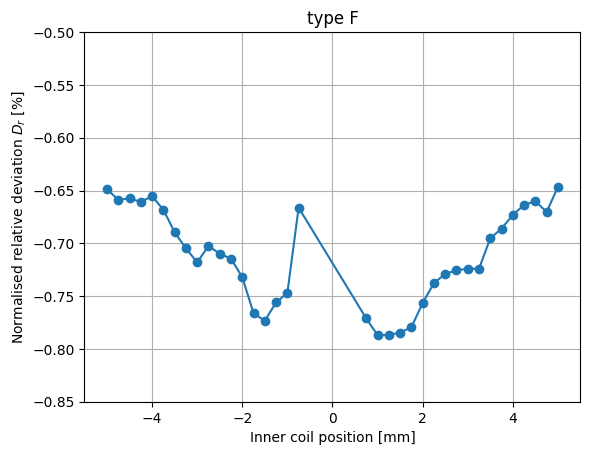

In [102]:
xSub = manualF_asymm_0_5lay["z_vec"]
pos = layer_5_windingtotF["IC_positions"]
# Find the indices where x matches the positions in pos
indices = np.searchsorted(xSub, pos)
Ref = 50*(abs(layer_5_windingtotF["UOC_voltages"])-abs(layer_5_windingtotF["LOC_voltages"]))
new = 50*(np.flipud(manualF_asymm_0_5lay["v_upp"][indices])-manualF_asymm_0_5lay["v_low"][indices])
x = layer_5_windingtotF["IC_positions"]

d = 0.5
dev = (Ref[abs(x) > d]-new[abs(x) > d])/Ref[abs(x) > d]
plt.plot(x[abs(x) > d], 100*dev, 'o-')
plt.xlabel('Inner coil position [mm]')
plt.ylabel(r'Normalised relative deviation $D_r$ [%]')
plt.title('type F')
plt.ylim([-0.85, -0.5])
plt.grid()

In [124]:
import numpy as np

# define matrix1, matrix2, and matrix3 as NumPy arrays
matrix1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matrix2 = np.arange(10,19,1).reshape((3,3))
matrix3 = np.arange(20,29,1).reshape((3,3))

# define the ranges a, b, c, and d
a = 14
b = 16
c = 22
d = 27

# create boolean masks for the values in matrix2 and matrix3 that fall within the specified ranges
mask2 = np.logical_and(matrix2 >= a, matrix2 <= b)
#mask3 = np.logical_and(matrix3 <= d)

# create a boolean mask for the values in matrix1 that should be set to zero
mask1 = np.logical_and(mask2, matrix3 <= d)

# set the corresponding values in matrix1 to zero
matrix1[mask1] = 0

# print the updated matrix1
print(matrix1)

[[1 2 3]
 [4 0 0]
 [0 8 9]]


21.0
22.5


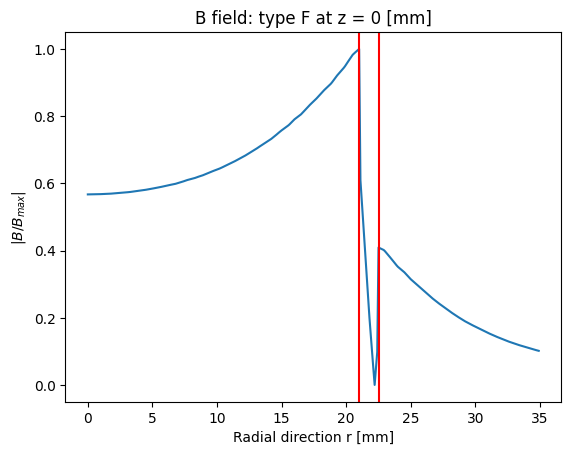

In [134]:
from MakeBfield import get_b_field, indx_closest


#1D plot of gradient at given z
r_vec, z_vec, b_mat_z, b_mat_r = get_b_field('../dataMap/bFields/' + 'typeF_dr_1_dz_01_1layer', True)
b_tot = np.sqrt(b_mat_r**2 + b_mat_z**2)
#r coordinate to plot gradient at
z_view = 0
#r_view = (UppOutCoil_OutRadius + UppOutCoil_InRadius)/2 #
n_z_view = round(z_view/0.01)

#Compute the gradient of magnetic field
#grad_r, grad_z = np.gradient(np.sqrt(np.real(B_Mat[:,:,0])**2+np.real(B_Mat[:,:,1])**2), dr, dz)
#grad_tot = np.sqrt(grad_r**2 + grad_z**2)

plt.plot(r_vec,b_tot[n_z_view,:]/np.amax(b_tot[n_z_view,:]))
b_left=b_tot[n_z_view,:][r_vec<22]
b_right=b_tot[n_z_view,:][r_vec>22]
r_left = r_vec[r_vec<22]
r_right = r_vec[r_vec>22]
print(r_left[indx_closest(b_left, np.amax(b_left))])
print(r_right[indx_closest(b_right, np.amax(b_right))])

plt.title('B field: type F at z = '+str(z_view) + ' [mm]')
plt.xlabel("Radial direction r [mm]")
plt.ylabel(r'$| B/ B_{max}|$') #[mT/mm]$
plt.axvline(r_left[indx_closest(b_left, np.amax(b_left))], color = 'r')
plt.axvline(r_right[indx_closest(b_right, np.amax(b_right))], color = 'r')

In [135]:
wire_width = 0.2032
ins_width = 0.0178
wire_tot = wire_width + 2*ins_width
print(wire_tot*6)

1.4327999999999999


In [4]:
import numpy as np
from MakeBfield import moving_average

arr = [1, 2, 3, 7, 9]
print(np.average(arr))
print(moving_average(arr,3))



4.4
[2.         4.         6.33333333]


In [40]:
vec = np.linspace(0,4.75,20)
print(vec)
print((vec%0.25)==0)

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25
 3.5  3.75 4.   4.25 4.5  4.75]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


In [30]:
np.round(0.497,2)

0.5

In [10]:
34 - 14.5 - 0.2032


19.2968

In [43]:
print(len(np.zeros(5)))


5


In [45]:
np.arange(0,10.1,0.1)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

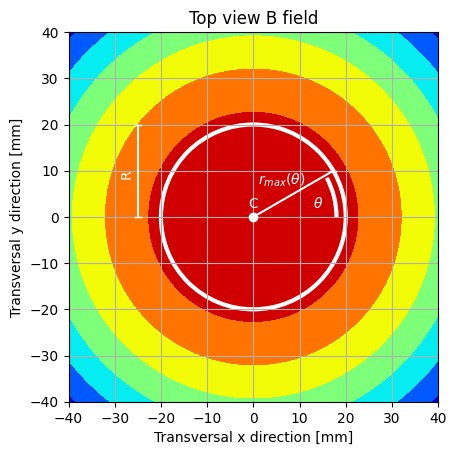

In [82]:
import math
from matplotlib import patches
x = np.arange(-40,40.1,0.1)
y = np.arange(-40,40.1,0.1)
sigma = 8

xv, yv = np.meshgrid(x, y)
B = math.e**(-0.5*(xv**2 + yv**2)/(sigma**2))
fig = plt.figure()
ax = fig.add_subplot()
#levels = np.linspace(np.amin(B), np.amax(B), 20)
plt.contourf(xv, yv, np.log(B), cmap='jet')

color = 'white'

circ1 = plt.Circle((0,0), 20, color=color, fill=False, lw=3)
ax.add_patch(circ1)

# center inner coil
plt.plot(0,0, 'o', color=color)
plt.text(-1, 2, 'C', rotation = 'horizontal', color=color)


x1, y1 = [0, 19.75], [0, 0]
#plt.plot(x1, y1, marker = 'o', color='w')
#plt.plot(x1, y1, marker = '|', color='w')
#plt.plot(x1, y1, color='w')
#plot radius
x2, y2 = [-25, -25], [0, 20]
plt.plot(x2, y2, marker = '_', color=color)
plt.text(-29, 9, 'R', rotation = 'vertical', color=color)


x3, y3 = [0, 20*np.cos(np.pi/6)], [0, 20*np.sin(np.pi/6)]
plt.plot(x3, y3, marker = '_', color=color)
plt.text(1, 7, r'$r_{max}(\theta)$', rotation = 'horizontal', color=color)

arc1 = patches.Arc((0,0), 2*18, 2*18, angle=0, theta1=0, theta2=28, color=color, fill=False, lw=3)
ax.add_patch(arc1)
plt.text(13, 2, r'$\theta$', rotation = 'horizontal', color=color)

plt.title('Top view B field')
plt.xlabel('Transversal x direction [mm]')
plt.ylabel('Transversal y direction [mm]')
plt.xlim([-40,40])
plt.ylim([-40,40])
plt.grid()
ax.set_aspect('equal', adjustable='box')
#plt.savefig('../FiguresSim/topviewWhite.pdf', bbox_inches='tight')



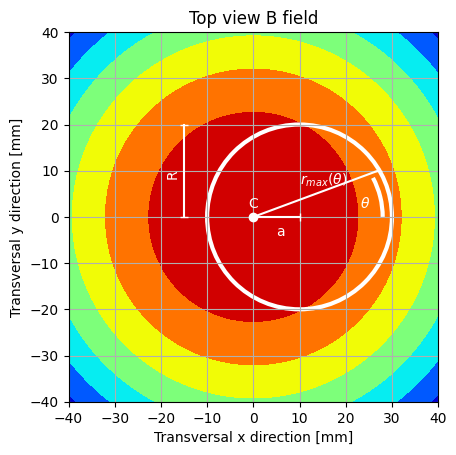

In [83]:
import math
from matplotlib import patches
x = np.arange(-40,40.1,0.1)
y = np.arange(-40,40.1,0.1)
sigma = 8

xv, yv = np.meshgrid(x, y)
B = math.e**(-0.5*(xv**2 + yv**2)/(sigma**2))
fig = plt.figure()
ax = fig.add_subplot()
#levels = np.linspace(np.amin(B), np.amax(B), 20)
plt.contourf(xv, yv, np.log(B), cmap='jet')

color = 'white'

circ1 = plt.Circle((10,0), 20, color=color, fill=False, lw=3)
ax.add_patch(circ1)

# center inner coil
plt.plot(0,0, 'o', color=color)
plt.text(-1, 2, 'C', rotation = 'horizontal', color=color)


x1, y1 = [0, 10], [0, 0]
#plt.plot(x1, y1, marker = 'o', color='w')
plt.plot(x1, y1, marker = '|', color=color)
plt.text(5, -4, 'a', rotation = 'horizontal', color=color)
#plt.plot(x1, y1, color='w')
#plot radius
x2, y2 = [-15, -15], [0, 20]
plt.plot(x2, y2, marker = '_', color=color)
plt.text(-19, 9, 'R', rotation = 'vertical', color=color)

x3, y3 = [0, 27], [0, 10]
#x3, y3 = [10, 10 + 20*np.cos(np.pi/6)], [0, 20*np.sin(np.pi/6)]
plt.plot(x3, y3, marker = '_', color=color)
plt.text(10, 7, r'$r_{max}(\theta)$', rotation = 'horizontal', color=color)

arc1 = patches.Arc((10,0), 2*18, 2*18, angle=0, theta1=0, theta2=28, color=color, fill=False, lw=3)
ax.add_patch(arc1)
plt.text(23, 2, r'$\theta$', rotation = 'horizontal', color=color)

plt.title('Top view B field')
plt.xlabel('Transversal x direction [mm]')
plt.ylabel('Transversal y direction [mm]')
plt.xlim([-40,40])
plt.ylim([-40,40])
plt.grid()
ax.set_aspect('equal', adjustable='box')
#plt.savefig('../FiguresSim/topviewAsymmWhite.pdf', bbox_inches='tight')

3.083204060734804e-07


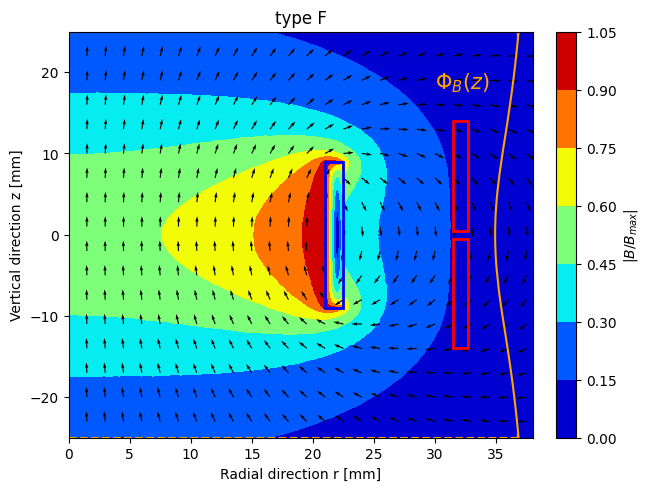

In [22]:
from MakeBfield import plot_b_field

%matplotlib inline
# Call the plotting function from MakeBfield
plot_b_field('typeF_dr_1_dz_01_Mesh_0.005', n_quiver_z=300, n_quiver_r=15, coil_type='F', contour_norm=True)
'acc for nx and ny?'
# Adjust plot
plt.xlabel("Radial direction r [mm]")
plt.ylabel("Vertical direction z [mm]")
plt.title('type F')
#plt.ylim([-25,25])

z_vec, phi_vec = MakeBfield.return_flux_vec(filename='typeF_dr_1_dz_01_1layer_symm_Mesh_0.005')
print(np.amax(phi_vec))
plt.plot(-phi_vec*(10**7)+38, z_vec ,label='Symm flux Type F', color='orange')
plt.text(30, 18, r'$\Phi_B(z)$', rotation = 'horizontal', color='orange', weight='bold', fontsize=15)


x1, y1 = [0, 36.7], [25, 25]
plt.plot(x1, y1, marker = '|', color='orange', linestyle='dashed')
x2, y2 = [0, 36.7], [-25, -25]
plt.plot(x2, y2, marker = '|', color='orange', linestyle='dashed')
x3, y3 = [0, 36.95], [30, 30]
plt.plot(x3, y3, marker = '|', color='orange', linestyle='dashed')
x4, y4 = [0, 36.95], [-30, -30]
plt.plot(x4, y4, marker = '|', color='orange', linestyle='dashed')

plt.show(block=False)


3.083204060734804e-07


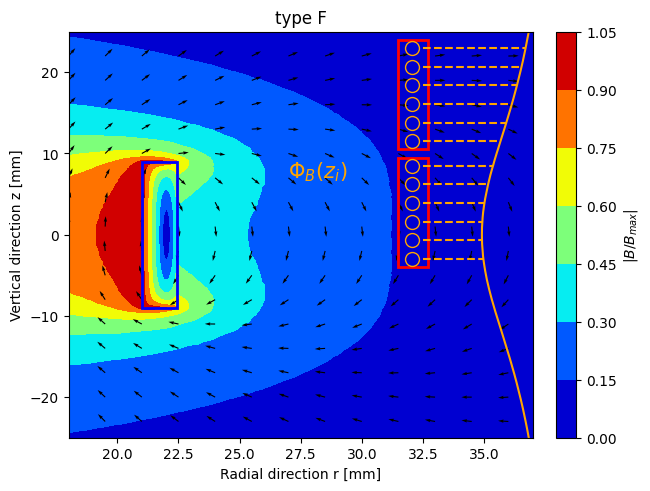

In [5]:
from MakeBfield import plot_b_field
from MakeBfield import indx_closest
%matplotlib inline
# Call the plotting function from MakeBfield
plot_b_field('typeF_dr_1_dz_01_Mesh_0.005', n_quiver_z=300, n_quiver_r=15, coil_type='F', contour_norm=True, shift_y=10)
'acc for nx and ny?'
# Adjust plot
plt.xlabel("Radial direction r [mm]")
plt.ylabel("Vertical direction z [mm]")
plt.title('type F')
plt.ylim([-25,25])
plt.xlim([18,37])

z_vec, phi_vec = MakeBfield.return_flux_vec(filename='typeF_dr_1_dz_01_1layer_symm_Mesh_0.005')
print(np.amax(phi_vec))
plt.plot(-phi_vec*(10**7)+38, z_vec ,label='Symm flux Type F', color='orange')
plt.text(27, 7, r'$\Phi_B(z_i)$', rotation = 'horizontal', color='orange', weight='bold', fontsize=15)

"""
x1, y1 = [0, 36.7], [25, 25]
plt.plot(x1, y1, marker = '|', color='orange', linestyle='dashed')
x2, y2 = [0, 36.7], [-25, -25]
plt.plot(x2, y2, marker = '|', color='orange', linestyle='dashed')
x3, y3 = [0, 36.95], [30, 30]
plt.plot(x3, y3, marker = '|', color='orange', linestyle='dashed')
x4, y4 = [0, 36.95], [-30, -30]
plt.plot(x4, y4, marker = '|', color='orange', linestyle='dashed')
"""
n = 6
x_vec_wire = np.ones(n)*32.05
y_vec_wire = np.linspace(1.5, 13,n)
shift = 10

plt.plot(x_vec_wire,y_vec_wire+shift, 'o', markersize=10, markerfacecolor='none', markeredgecolor='orange')
plt.plot(x_vec_wire,-y_vec_wire+shift, 'o', markersize=10, markerfacecolor='none', markeredgecolor='orange')

for i in range(0,n):
    j = indx_closest(z_vec, y_vec_wire[i]+shift)
    plt.plot([32.5, -phi_vec[j]*(10**7)+38], [y_vec_wire[i]+shift, y_vec_wire[i]+shift], marker = 'none', color='orange', linestyle='dashed')
    j = indx_closest(z_vec, -y_vec_wire[i]+shift)
    plt.plot([32.5, -phi_vec[j]*(10**7)+38], [-y_vec_wire[i]+shift, -y_vec_wire[i]+shift], marker = 'none', color='orange', linestyle='dashed')


plt.show(block=False)